In [1]:
from osgeo import gdal

Driver: ENVI/ENVI .hdr Labelled
Size is 250 x 14678 x 256
Projection is 


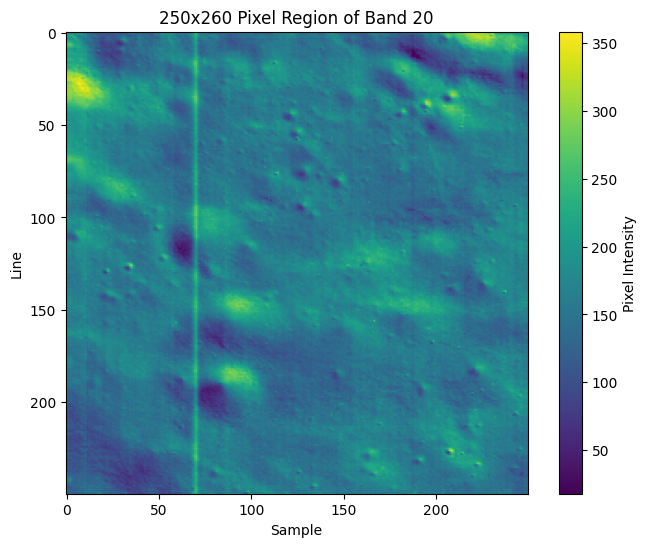

In [4]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

# Path to your QUB file
qub_file_path = r"D:\Antariksh\ch2_data\data\calibrated\20240131\ch2_iir_nci_20240131T2241351052_d_img_d18.qub"

# Open the QUB file using GDAL
dataset = gdal.Open(qub_file_path, gdal.GA_ReadOnly)
    
if not dataset:
    print("Failed to open file!")
    exit()

# Print some information about the file
print("Driver: {}/{}".format(dataset.GetDriver().ShortName, dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize, dataset.RasterYSize, dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))

# Read band 20 (1-based index, so band 20 is at index 19)
band_index = 19
band = dataset.GetRasterBand(band_index + 1)

# Read the band data as a numpy array
band20_data = band.ReadAsArray()

# Define the region of interest (250x250 pixels)
start_line = 0
end_line = start_line + 250
start_sample = 0
end_sample = start_sample + 260

# Extract the region of interest from band 20 data
region_of_interest = band20_data[start_line:end_line, start_sample:end_sample]

# Display the region of interest
plt.figure(figsize=(8, 6))
plt.imshow(region_of_interest)
plt.colorbar(label='Pixel Intensity')
plt.title('250x260 Pixel Region of Band 20')
plt.xlabel('Sample')
plt.ylabel('Line')
plt.show()


     Spectral Channel     Radiance
0                   1   788.654541
1                   2   898.201904
2                   3  1007.749268
3                   4  1117.296631
4                   5  1281.617676
..                ...          ...
251               252   291.834534
252               253   325.862823
253               254   332.809265
254               255   376.905273
255               256   410.933533

[256 rows x 2 columns]


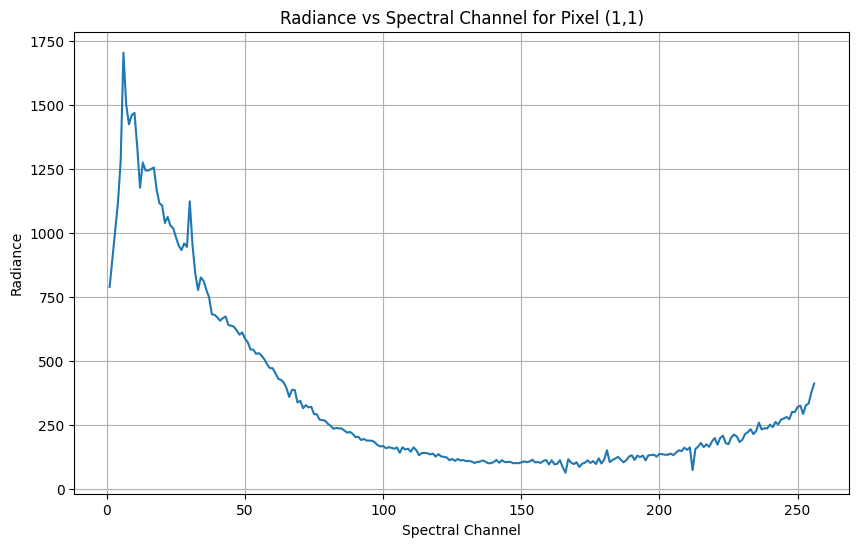

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Path to the QUB file
qub_file_path = "D:/Antariksh/ch2_data/data/calibrated/20240131/ch2_iir_nci_20240131T2241351052_d_img_d18.qub"

# Open the QUB file
dataset = gdal.Open(qub_file_path, gdal.GA_ReadOnly)

if not dataset:
    print("Failed to open file!")
    exit()

# Get the number of bands
num_bands = dataset.RasterCount

# Coordinates of the pixel (1,1)
x, y = 0, 0

# Initialize an array to store the spectral data
spectral_data = []

# Loop through each band and extract the value for the specified pixel
for band_index in range(num_bands):
    band = dataset.GetRasterBand(band_index + 1)
    pixel_value = band.ReadAsArray(x, y, 1, 1)[0, 0]
    spectral_data.append(pixel_value)

# Convert spectral data to a numpy array
spectral_data = np.array(spectral_data)

# Create a DataFrame for the spectral data
df = pd.DataFrame({
    'Spectral Channel': range(1, num_bands + 1),
    'Radiance': spectral_data
})

# Display the DataFrame
print(df)

# Plot the radiance vs spectral channel
plt.figure(figsize=(10, 6))
plt.plot(df['Spectral Channel'], df['Radiance'])
plt.title('Radiance vs Spectral Channel for Pixel (1,1)')
plt.xlabel('Spectral Channel')
plt.ylabel('Radiance')
plt.grid(True)
plt.show()


Driver: ENVI/ENVI .hdr Labelled
Size is 250 x 14678 x 256
Projection is 


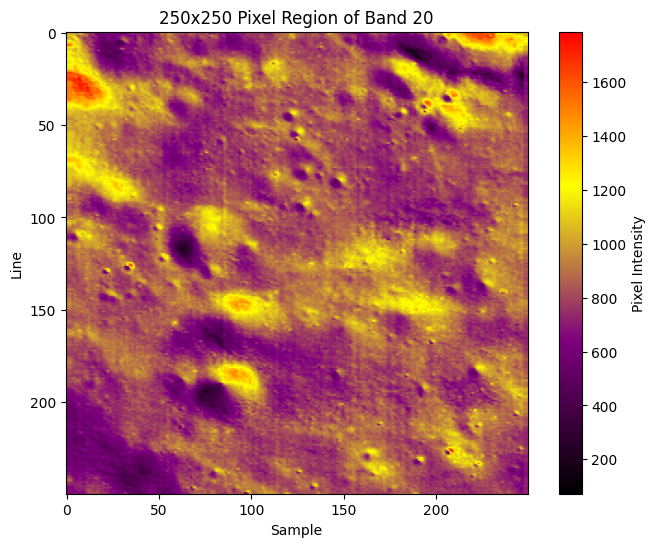

In [25]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Path to your QUB file
qub_file_path = r"D:\Antariksh\ch2_data\data\calibrated\20240131\ch2_iir_nci_20240131T2241351052_d_img_d18.qub"

# Open the QUB file using GDAL
dataset = gdal.Open(qub_file_path, gdal.GA_ReadOnly)

if not dataset:
    print("Failed to open file!")
    exit()

# Print some information about the file
print("Driver: {}/{}".format(dataset.GetDriver().ShortName, dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize, dataset.RasterYSize, dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))

# Read band 20 (1-based index, so band 20 is at index 19)
band_index = 20
band = dataset.GetRasterBand(band_index + 1)

# Read the band data as a numpy array
band20_data = band.ReadAsArray()

# Define the region of interest (250x250 pixels)
start_line = 0
end_line = start_line + 250
start_sample = 0
end_sample = start_sample + 250

# Extract the region of interest from band 20 data
region_of_interest = band20_data[start_line:end_line, start_sample:end_sample]

# Define a custom colormap
colors = [(0, 0, 0), (0.5, 0, 0.5), (1, 1, 0), (1, 0, 0)]  # Example colors in RGB format
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# Display the region of interest with the custom colormap
plt.figure(figsize=(8, 6))
plt.imshow(region_of_interest, cmap=custom_cmap)  # Set the custom colormap here
plt.colorbar(label='Pixel Intensity')
plt.title('250x250 Pixel Region of Band 20')
plt.xlabel('Sample')
plt.ylabel('Line')
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the band information from Table 8
band_info = {
    1: {'Center Wavelength (nm)': 712.3},
    2: {'Center Wavelength (nm)': 729.2},
    3: {'Center Wavelength (nm)': 746.0},
    4: {'Center Wavelength (nm)': 762.9},
    5: {'Center Wavelength (nm)': 779.7},
    6: {'Center Wavelength (nm)': 796.6},
    7: {'Center Wavelength (nm)': 813.4},
    8: {'Center Wavelength (nm)': 830.3},
    9: {'Center Wavelength (nm)': 847.2},
    10: {'Center Wavelength (nm)': 864.0},
    11: {'Center Wavelength (nm)': 880.9},
    12: {'Center Wavelength (nm)': 897.7},
    13: {'Center Wavelength (nm)': 914.6},
    14: {'Center Wavelength (nm)': 931.4},
    15: {'Center Wavelength (nm)': 948.3},
    16: {'Center Wavelength (nm)': 965.1},
    17: {'Center Wavelength (nm)': 982.0},
    18: {'Center Wavelength (nm)': 998.8},
    19: {'Center Wavelength (nm)': 1015.7},
    20: {'Center Wavelength (nm)': 1032.5},
    21: {'Center Wavelength (nm)': 1049.4},
    22: {'Center Wavelength (nm)': 1066.2},
    23: {'Center Wavelength (nm)': 1083.1},
    24: {'Center Wavelength (nm)': 1099.9},
    25: {'Center Wavelength (nm)': 1116.8},
    26: {'Center Wavelength (nm)': 1133.6},
    27: {'Center Wavelength (nm)': 1150.5},
    28: {'Center Wavelength (nm)': 1167.3},
    29: {'Center Wavelength (nm)': 1184.2},
    30: {'Center Wavelength (nm)': 1201.1},
    31: {'Center Wavelength (nm)': 1217.9},
    32: {'Center Wavelength (nm)': 1234.8},
    33: {'Center Wavelength (nm)': 1251.6},
    34: {'Center Wavelength (nm)': 1268.5},
    35: {'Center Wavelength (nm)': 1285.3},
    36: {'Center Wavelength (nm)': 1302.2},
    37: {'Center Wavelength (nm)': 1319.0},
    38: {'Center Wavelength (nm)': 1335.9},
    39: {'Center Wavelength (nm)': 1352.7},
    40: {'Center Wavelength (nm)': 1369.6},
    41: {'Center Wavelength (nm)': 1386.4},
    42: {'Center Wavelength (nm)': 1403.3},
    43: {'Center Wavelength (nm)': 1420.1},
    44: {'Center Wavelength (nm)': 1437.0},
    45: {'Center Wavelength (nm)': 1453.8},
    46: {'Center Wavelength (nm)': 1470.7},
    47: {'Center Wavelength (nm)': 1487.5},
    48: {'Center Wavelength (nm)': 1504.4},
    49: {'Center Wavelength (nm)': 1521.2},
    50: {'Center Wavelength (nm)': 1538.1},
    51: {'Center Wavelength (nm)': 1555.0},
    52: {'Center Wavelength (nm)': 1571.8},
    53: {'Center Wavelength (nm)': 1588.7},
    54: {'Center Wavelength (nm)': 1605.5},
    55: {'Center Wavelength (nm)': 1622.4},
    56: {'Center Wavelength (nm)': 1639.2},
    57: {'Center Wavelength (nm)': 1656.1},
    58: {'Center Wavelength (nm)': 1672.9},
    59: {'Center Wavelength (nm)': 1689.8},
    60: {'Center Wavelength (nm)': 1706.6},
    61: {'Center Wavelength (nm)': 1723.5},
    62: {'Center Wavelength (nm)': 1740.3},
    63: {'Center Wavelength (nm)': 1757.2},
    64: {'Center Wavelength (nm)': 1774.0},
    65: {'Center Wavelength (nm)': 1790.9},
    66: {'Center Wavelength (nm)': 1807.7},
    67: {'Center Wavelength (nm)': 1824.6},
    68: {'Center Wavelength (nm)': 1841.4},
    69: {'Center Wavelength (nm)': 1858.3},
    70: {'Center Wavelength (nm)': 1875.1},
    71: {'Center Wavelength (nm)': 1892.0},
    72: {'Center Wavelength (nm)': 1908.9},
    73: {'Center Wavelength (nm)': 1925.7},
    74: {'Center Wavelength (nm)': 1942.6},
    75: {'Center Wavelength (nm)': 1959.4},
    76: {'Center Wavelength (nm)': 1976.3},
    77: {'Center Wavelength (nm)': 1993.1},
    78: {'Center Wavelength (nm)': 2010.0},
    79: {'Center Wavelength (nm)': 2026.8},
    80: {'Center Wavelength (nm)': 2043.7},
    81: {'Center Wavelength (nm)': 2060.5},
    82: {'Center Wavelength (nm)': 2077.4},
    83: {'Center Wavelength (nm)': 2094.2},
    84: {'Center Wavelength (nm)': 2111.1},
    85: {'Center Wavelength (nm)': 2127.9},
    86: {'Center Wavelength (nm)': 2144.8},
    87: {'Center Wavelength (nm)': 2161.6},
    88: {'Center Wavelength (nm)': 2178.5},
    89: {'Center Wavelength (nm)': 2195.3},
    90: {'Center Wavelength (nm)': 2212.2},
    91: {'Center Wavelength (nm)': 2229.0},
    92: {'Center Wavelength (nm)': 2245.9},
    93: {'Center Wavelength (nm)': 2262.8},
    94: {'Center Wavelength (nm)': 2279.6},
    95: {'Center Wavelength (nm)': 2296.5},
    96: {'Center Wavelength (nm)': 2313.3},
    97: {'Center Wavelength (nm)': 2330.2},
    98: {'Center Wavelength (nm)': 2347.0},
    99: {'Center Wavelength (nm)': 2363.9},
    100: {'Center Wavelength (nm)': 2380.7},
    101: {'Center Wavelength (nm)': 2397.6},
    102: {'Center Wavelength (nm)': 2414.4},
    103: {'Center Wavelength (nm)': 2431.3},
    104: {'Center Wavelength (nm)': 2448.1},
    105: {'Center Wavelength (nm)': 2465.0},
    106: {'Center Wavelength (nm)': 2481.8},
    107: {'Center Wavelength (nm)': 2498.7},
    108: {'Center Wavelength (nm)': 2515.5},
    109: {'Center Wavelength (nm)': 2532.4},
    110: {'Center Wavelength (nm)': 2549.2},
    111: {'Center Wavelength (nm)': 2566.1},
    112: {'Center Wavelength (nm)': 2582.9},
    113: {'Center Wavelength (nm)': 2599.8},
    114: {'Center Wavelength (nm)': 2616.7},
    115: {'Center Wavelength (nm)': 2633.5},
    116: {'Center Wavelength (nm)': 2650.4},
    117: {'Center Wavelength (nm)': 2667.2},
    118: {'Center Wavelength (nm)': 2684.1},
    119: {'Center Wavelength (nm)': 2700.9},
    120: {'Center Wavelength (nm)': 2717.8},
    121: {'Center Wavelength (nm)': 2734.6},
    122: {'Center Wavelength (nm)': 2751.5},
    123: {'Center Wavelength (nm)': 2768.3},
    124: {'Center Wavelength (nm)': 2785.2},
    125: {'Center Wavelength (nm)': 2802.0},
    126: {'Center Wavelength (nm)': 2818.9},
    127: {'Center Wavelength (nm)': 2835.7},
    128: {'Center Wavelength (nm)': 2852.6},
    129: {'Center Wavelength (nm)': 2869.4},
    130: {'Center Wavelength (nm)': 2886.3},
    131: {'Center Wavelength (nm)': 2903.1},
    132: {'Center Wavelength (nm)': 2920.0},
    133: {'Center Wavelength (nm)': 2936.8},
    134: {'Center Wavelength (nm)': 2953.7},
    135: {'Center Wavelength (nm)': 2970.6},
    136: {'Center Wavelength (nm)': 2987.4},
    137: {'Center Wavelength (nm)': 3004.3},
    138: {'Center Wavelength (nm)': 3021.1},
    139: {'Center Wavelength (nm)': 3038.0},
    140: {'Center Wavelength (nm)': 3054.8},
    141: {'Center Wavelength (nm)': 3071.7},
    142: {'Center Wavelength (nm)': 3088.5},
    143: {'Center Wavelength (nm)': 3105.4},
    144: {'Center Wavelength (nm)': 3122.2},
    145: {'Center Wavelength (nm)': 3139.1},
    146: {'Center Wavelength (nm)': 3155.9},
    147: {'Center Wavelength (nm)': 3172.8},
    148: {'Center Wavelength (nm)': 3189.6},
    149: {'Center Wavelength (nm)': 3206.5},
    150: {'Center Wavelength (nm)': 3223.3},
    151: {'Center Wavelength (nm)': 3240.2},
    152: {'Center Wavelength (nm)': 3257.0},
    153: {'Center Wavelength (nm)': 3273.9},
    154: {'Center Wavelength (nm)': 3290.7},
    155: {'Center Wavelength (nm)': 3307.6},
    156: {'Center Wavelength (nm)': 3324.5},
    157: {'Center Wavelength (nm)': 3341.3},
    158: {'Center Wavelength (nm)': 3358.2},
    159: {'Center Wavelength (nm)': 3375.0},
    160: {'Center Wavelength (nm)': 3391.9},
    161: {'Center Wavelength (nm)': 3408.7},
    162: {'Center Wavelength (nm)': 3425.6},
    163: {'Center Wavelength (nm)': 3442.4},
    164: {'Center Wavelength (nm)': 3459.3},
    165: {'Center Wavelength (nm)': 3476.1},
    166: {'Center Wavelength (nm)': 3493.0},
    167: {'Center Wavelength (nm)': 3509.8},
    168: {'Center Wavelength (nm)': 3526.7},
    169: {'Center Wavelength (nm)': 3543.5},
    170: {'Center Wavelength (nm)': 3560.4},
    171: {'Center Wavelength (nm)': 3577.2},
    172: {'Center Wavelength (nm)': 3594.1},
    173: {'Center Wavelength (nm)': 3610.9},
    174: {'Center Wavelength (nm)': 3627.8},
    175: {'Center Wavelength (nm)': 3644.6},
    176: {'Center Wavelength (nm)': 3661.5},
    177: {'Center Wavelength (nm)': 3678.3},
    178: {'Center Wavelength (nm)': 3695.2},
    179: {'Center Wavelength (nm)': 3712.1},
    180: {'Center Wavelength (nm)': 3728.9},
    181: {'Center Wavelength (nm)': 3745.8},
    182: {'Center Wavelength (nm)': 3762.6},
    183: {'Center Wavelength (nm)': 3779.5},
    184: {'Center Wavelength (nm)': 3796.3},
    185: {'Center Wavelength (nm)': 3813.2},
    186: {'Center Wavelength (nm)': 3830.0},
    187: {'Center Wavelength (nm)': 3846.9},
    188: {'Center Wavelength (nm)': 3863.7},
    189: {'Center Wavelength (nm)': 3880.6},
    190: {'Center Wavelength (nm)': 3897.4},
    191: {'Center Wavelength (nm)': 3914.3},
    192: {'Center Wavelength (nm)': 3931.1},
    193: {'Center Wavelength (nm)': 3948.0},
    194: {'Center Wavelength (nm)': 3964.8},
    195: {'Center Wavelength (nm)': 3981.7},
    196: {'Center Wavelength (nm)': 3998.5},
    197: {'Center Wavelength (nm)': 4015.4},
    198: {'Center Wavelength (nm)': 4032.2},
    199: {'Center Wavelength (nm)': 4049.1},
    200: {'Center Wavelength (nm)': 4066.0},
    201: {'Center Wavelength (nm)': 4082.8},
    202: {'Center Wavelength (nm)': 4099.7},
    203: {'Center Wavelength (nm)': 4116.5},
    204: {'Center Wavelength (nm)': 4133.4},
    205: {'Center Wavelength (nm)': 4150.2},
    206: {'Center Wavelength (nm)': 4167.1},
    207: {'Center Wavelength (nm)': 4183.9},
    208: {'Center Wavelength (nm)': 4200.8},
    209: {'Center Wavelength (nm)': 4217.6},
    210: {'Center Wavelength (nm)': 4234.5},
    211: {'Center Wavelength (nm)': 4251.3},
    212: {'Center Wavelength (nm)': 4268.2},
    213: {'Center Wavelength (nm)': 4285.0},
    214: {'Center Wavelength (nm)': 4301.9},
    215: {'Center Wavelength (nm)': 4318.7},
    216: {'Center Wavelength (nm)': 4335.6},
    217: {'Center Wavelength (nm)': 4352.4},
    218: {'Center Wavelength (nm)': 4369.3},
    219: {'Center Wavelength (nm)': 4386.1},
    220: {'Center Wavelength (nm)': 4403.0},
    221: {'Center Wavelength (nm)': 4419.9},
    222: {'Center Wavelength (nm)': 4436.7},
    223: {'Center Wavelength (nm)': 4453.6},
    224: {'Center Wavelength (nm)': 4470.4},
    225: {'Center Wavelength (nm)': 4487.3},
    226: {'Center Wavelength (nm)': 4504.1},
    227: {'Center Wavelength (nm)': 4521.0},
    228: {'Center Wavelength (nm)': 4537.8},
    229: {'Center Wavelength (nm)': 4554.7},
    230: {'Center Wavelength (nm)': 4571.5},
    231: {'Center Wavelength (nm)': 4588.4},
    232: {'Center Wavelength (nm)': 4605.2},
    233: {'Center Wavelength (nm)': 4622.1},
    234: {'Center Wavelength (nm)': 4638.9},
    235: {'Center Wavelength (nm)': 4655.8},
    236: {'Center Wavelength (nm)': 4672.6},
    237: {'Center Wavelength (nm)': 4689.5},
    238: {'Center Wavelength (nm)': 4706.3},
    239: {'Center Wavelength (nm)': 4723.2},
    240: {'Center Wavelength (nm)': 4740.0},
    241: {'Center Wavelength (nm)': 4756.9},
    242: {'Center Wavelength (nm)': 4773.8},
    243: {'Center Wavelength (nm)': 4790.6},
    244: {'Center Wavelength (nm)': 4807.5},
    245: {'Center Wavelength (nm)': 4824.3},
    246: {'Center Wavelength (nm)': 4841.2},
    247: {'Center Wavelength (nm)': 4858.0},
    248: {'Center Wavelength (nm)': 4874.9},
    249: {'Center Wavelength (nm)': 4891.7},
    250: {'Center Wavelength (nm)': 4908.6},
    251: {'Center Wavelength (nm)': 4925.4},
    252: {'Center Wavelength (nm)': 4942.3},
    253: {'Center Wavelength (nm)': 4959.1},
    254: {'Center Wavelength (nm)': 4976.0},
    255: {'Center Wavelength (nm)': 4992.8},
    256: {'Center Wavelength (nm)': 5009.7}}


     Wavelength (nm)     Radiance
0              712.3   788.654541
1              729.2   898.201904
2              746.0  1007.749268
3              762.9  1117.296631
4              779.7  1281.617676
..               ...          ...
251           4942.3   291.834534
252           4959.1   325.862823
253           4976.0   332.809265
254           4992.8   376.905273
255           5009.7   410.933533

[256 rows x 2 columns]


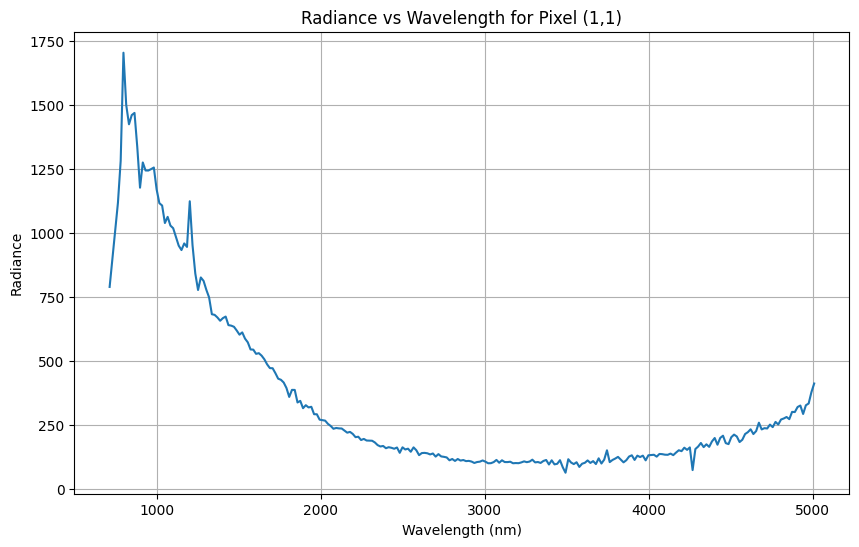

In [8]:
qub_file_path = "D:/Antariksh/ch2_data/data/calibrated/20240131/ch2_iir_nci_20240131T2241351052_d_img_d18.qub"

# Open the QUB file
dataset = gdal.Open(qub_file_path, gdal.GA_ReadOnly)

if not dataset:
    print("Failed to open file!")
    exit()

# Get the number of bands
num_bands = dataset.RasterCount

# Coordinates of the pixel (1,1)
x, y = 0, 0

# Initialize an array to store the spectral data
spectral_data = []

# Loop through each band and extract the value for the specified pixel
for band_index in range(num_bands):
    band = dataset.GetRasterBand(band_index + 1)
    pixel_value = band.ReadAsArray(x, y, 1, 1)[0, 0]
    spectral_data.append(pixel_value)

# Convert spectral data to a numpy array
spectral_data = np.array(spectral_data)

# Create a DataFrame for the spectral data
df = pd.DataFrame({
    'Wavelength (nm)': [band_info[i]['Center Wavelength (nm)'] for i in range(1, num_bands + 1)],
    'Radiance': spectral_data
})

# Display the DataFrame
print(df)

# Plot the radiance vs wavelength
plt.figure(figsize=(10, 6))
plt.plot(df['Wavelength (nm)'], df['Radiance'])
plt.title('Radiance vs Wavelength for Pixel (1,1)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Radiance')
plt.grid(True)
plt.show()


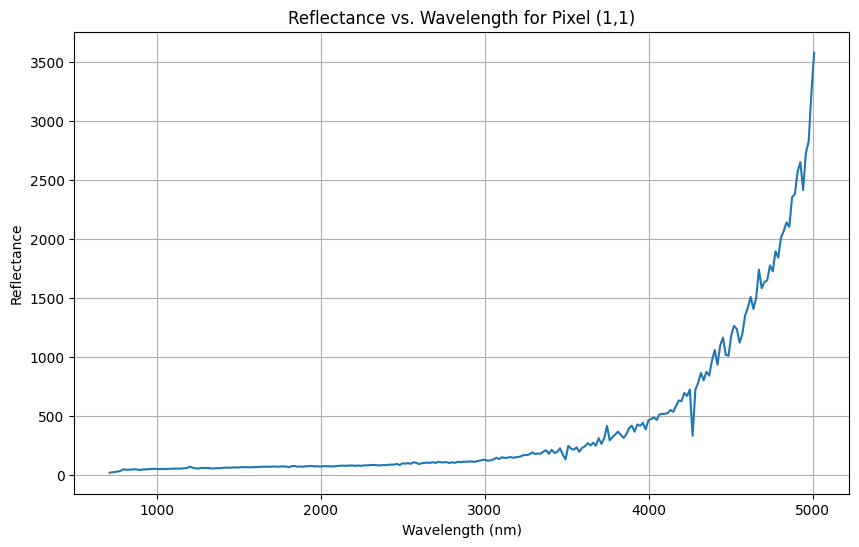

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from tabulate import tabulate
import math
import pandas as pd
# File paths
s1_path = "D:\\Antariksh\\ch2_data\\data\\calibrated\\20240131\\ch2_iir_nci_20240131T2241351052_d_img_d18.qub"
s2_path = "D:\\Antariksh\\extra_data_IIRS\\iir\\miscellaneous\\ch2_iirs_solar_flux.txt"

# Load the radiance data (s1) using GDAL
s1_dataset = gdal.Open(s1_path)
if s1_dataset is None:
    raise OSError("Unable to open the radiance file.")
s1 = s1_dataset.ReadAsArray()

# Load the solar irradiance data (s2)
s2_data = np.loadtxt(s2_path)

# Split the solar irradiance data into wavelengths and irradiance values
wavelengths = s2_data[:, 0]
s2 = s2_data[:, 1]

# Assuming `dpi` is provided or calculated elsewhere
dpi = math.pi  # Replace with the actual distance value if available

# Constant factor
constant_factor = 0.986161140705

# Calculate reflectance
reflectance = (s1 * dpi * (constant_factor ** 2)) / s2[:, np.newaxis, np.newaxis]

# Extract reflectance for pixel (0,0)
pixel_reflectance = reflectance[:, 0, 0]

# Plot Reflectance vs. Wavelength for pixel (0,0)
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, pixel_reflectance, linestyle='-')
plt.title('Reflectance vs. Wavelength for Pixel (1,1)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.grid(True)
plt.show()

# Create a table of values
table = np.column_stack((wavelengths, pixel_reflectance))
# Close the dataset
s1_dataset = None


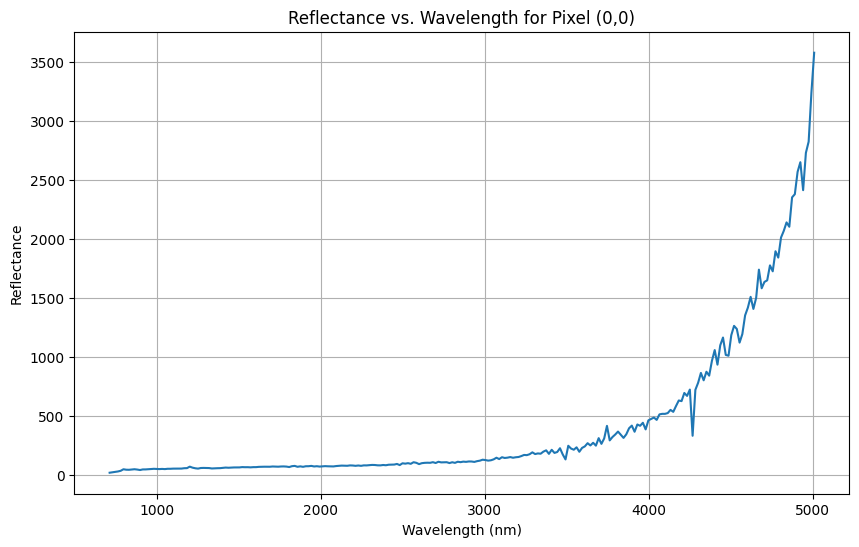

PermissionError: [Errno 13] Permission denied: 'D:\\Antariksh'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
import math
import pandas as pd

# File paths
s1_path = "D:\\Antariksh\\ch2_data\\data\\calibrated\\20240131\\ch2_iir_nci_20240131T2241351052_d_img_d18.qub"
s2_path = "D:\\Antariksh\\extra_data_IIRS\\iir\\miscellaneous\\ch2_iirs_solar_flux.txt"
csv_output_path = r'D:\Antariksh'

# Load the radiance data (s1) using GDAL
s1_dataset = gdal.Open(s1_path)
if s1_dataset is None:
    raise OSError("Unable to open the radiance file.")
s1 = s1_dataset.ReadAsArray()

# Load the solar irradiance data (s2)
s2_data = np.loadtxt(s2_path)

# Split the solar irradiance data into wavelengths and irradiance values
wavelengths = s2_data[:, 0]
s2 = s2_data[:, 1]

# Assuming `dpi` is provided or calculated elsewhere
dpi = math.pi  # Replace with the actual distance value if available

# Constant factor
constant_factor = 0.986161140705

# Calculate reflectance
reflectance = (s1 * dpi * (constant_factor ** 2)) / s2[:, np.newaxis, np.newaxis]

# Extract reflectance for pixel (0,0)
pixel_reflectance = reflectance[:, 0, 0]

# Plot Reflectance vs. Wavelength for pixel (0,0)
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, pixel_reflectance, linestyle='-')
plt.title('Reflectance vs. Wavelength for Pixel (0,0)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.grid(True)
plt.show()

# Create a table of values
table = np.column_stack((wavelengths, pixel_reflectance))


In [12]:
import csv



# Open the CSV file in write mode with appropriate encoding (e.g., UTF-8 for non-ASCII characters)
with open("reflectance_data.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row (optional)
    writer.writerow(["Wavelength", "Reflectance"])  # Replace with your column names

    # Write each row of data to the CSV file
    writer.writerows(table)

print("Data successfully written to CSV file!")


Data successfully written to CSV file!
